In [3]:
# Step - 1 Import Libarary
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [8]:
#Step 2:- load dataset

df = pd.read_csv('/content/tweets.csv')
df

candidate sentiment                                               text
0  CandidateA  positive  I love the policies of CandidateA. They seem v...
1  CandidateB  negative  CandidateB is not addressing the real issues a...
2  CandidateC   neutral  It was an average debate. Nothing exciting fro...
3  CandidateA  positive  Great speech by CandidateA today! Feeling hope...
4  CandidateB  negative  The recent comments by CandidateB are disappoi...
5  CandidateC   neutral  CandidateC shared their views but I remain und...
6  CandidateA  positive        Another reason why CandidateA gets my vote!
7  CandidateB  negative      Unimpressive performance by CandidateB again.
8  CandidateC   neutral  Still no clear stance from CandidateC on healt...
9  CandidateA  positive       CandidateA shows true leadership and vision.

In [6]:
# allowed columns
df = df[['candidate', 'sentiment', 'text']]

In [9]:
df

candidate sentiment                                               text
0  CandidateA  positive  I love the policies of CandidateA. They seem v...
1  CandidateB  negative  CandidateB is not addressing the real issues a...
2  CandidateC   neutral  It was an average debate. Nothing exciting fro...
3  CandidateA  positive  Great speech by CandidateA today! Feeling hope...
4  CandidateB  negative  The recent comments by CandidateB are disappoi...
5  CandidateC   neutral  CandidateC shared their views but I remain und...
6  CandidateA  positive        Another reason why CandidateA gets my vote!
7  CandidateB  negative      Unimpressive performance by CandidateB again.
8  CandidateC   neutral  Still no clear stance from CandidateC on healt...
9  CandidateA  positive       CandidateA shows true leadership and vision.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.6250 - loss: 1.0877 - val_accuracy: 0.0000e+00 - val_loss: 1.1145
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.6250 - loss: 1.0676 - val_accuracy: 0.0000e+00 - val_loss: 1.1261
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.5000 - loss: 1.0618 - val_accuracy: 0.0000e+00 - val_loss: 1.1412
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.5000 - loss: 1.0500 - val_accuracy: 0.0000e+00 - val_loss: 1.1598
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.5000 - loss: 1.0435 - val_accuracy: 0.0000e+00 - val_loss: 1.1814
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.5000 - loss: 1.0240 - val_accuracy: 0.0000e+00 - val_loss: 1.2086
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.5000 - loss: 1.0179 - val_accuracy: 0.0000e+00 - val_loss: 1.2421
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.5000 - loss: 1.0021 - val_acc

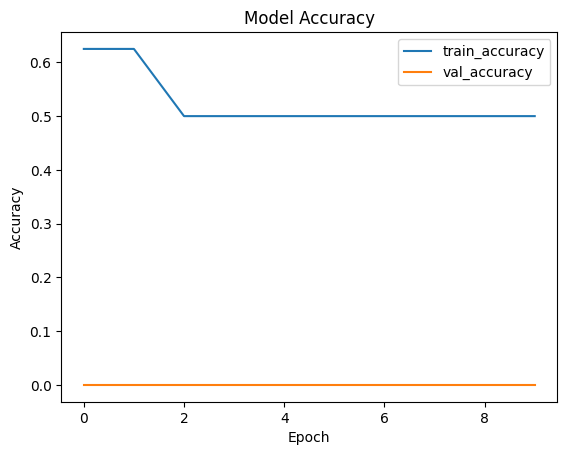

In [23]:
# text preprocessing
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\[.*?\]', '', text)  # commonly used for substituting patterns in strings based on RegEx
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # remove links
    text = re.sub(r'<.*?>+', '', text)  # remove HTML
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) # remove punctuation from the text
    text = re.sub(r'\n', '', text)  # remove newline from the text and convert into string
    text = re.sub(r'\w*\d\w*', '', text) # removes words in which contain digits like w3d, x2y
    return text

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['text'] = df['text'].apply(preprocess_text)
df['text'] = df['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Label Encoding

le = LabelEncoder()
df['sentiment encoded'] = le.fit_transform(df['sentiment'])
# Corrected column name from 'sentiment_encoded' to 'sentiment encoded'
y = to_categorical(df['sentiment encoded'])

# tokenization and padding

num_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=5000, lower = True)
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, max_len)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#create model
model = Sequential()
model.add(Embedding(5000, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

# train the model

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [24]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Test Loss: {loss:.2f}')
print(f'Validation Accuracy: {accuracy:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.0000e+00 - loss: 1.3091
Test Loss: 1.31
Validation Accuracy: 0.00


In [25]:
new_text = ['Candidate is ruining the debate!']
new_text_clean = [preprocess_text(t) for t in new_text]
new_text_seq = tokenizer.texts_to_sequences(new_text_clean)
new_text_pad = pad_sequences(new_text_seq, maxlen=100)
prediction = model.predict(new_text_pad)
predicted_label = le.inverse_transform([np.argmax(prediction)])
print("Predicted Sentiment:", predicted_label[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
Predicted Sentiment: positive
